<a href="https://colab.research.google.com/github/Syed-Bilal-Hussaini/Task-11/blob/main/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

In [6]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print(f"Features shape: {X.shape}")
print("Label distribution:")
print(pd.Series(y).value_counts(normalize=True))

Features shape: (569, 30)
Label distribution:
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear Kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
print(f"Linear SVM Accuracy: {accuracy_score(y_test, linear_svm.predict(X_test)):.4f}")

# RBF Kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
print(f"RBF SVM Accuracy: {accuracy_score(y_test, rbf_svm.predict(X_test)):.4f}")

Linear SVM Accuracy: 0.9561
RBF SVM Accuracy: 0.9825


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters: {grid.best_params_}")
best_model = grid.best_estimator_

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = best_model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



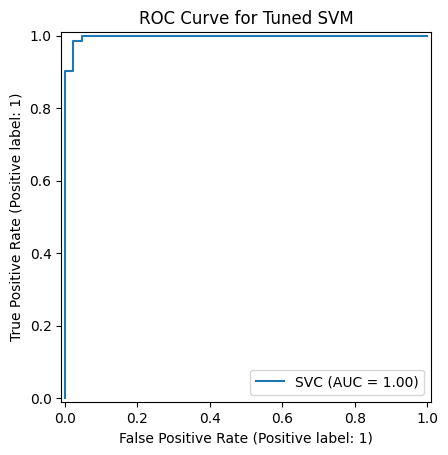

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve for Tuned SVM")
plt.show()

In [16]:
import joblib
from sklearn.pipeline import Pipeline

# Create a pipeline with the best parameters found
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', grid.best_estimator_)
])

# Save to disk
joblib.dump(final_pipeline, 'breast_cancer_model.pkl')
print("Model pipeline saved successfully!")

Model pipeline saved successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')